## Теория вероятностей и Математическая статистика

### Тема-6. Взаимосвязь величин. Параметрические и непараметрические показатели корреляции. Корреляционный анализ.

#### ДР

##### 1.

Даны значения величины заработной платы заемщиков банка (`zp`) и значения их поведенческого кредитного скоринга (`ks`):
```
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
```

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции `cov` из `numpy`

*Полученные значения должны быть равны.*

Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек `numpy` и `pandas`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

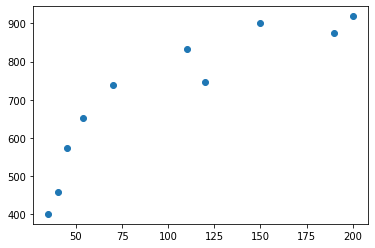

In [3]:
plt.scatter(zp, ks)
plt.show()

In [4]:
M_zp = np.mean(zp)
M_zp

101.4

In [5]:
M_ks = np.mean(ks)
M_ks

709.9

In [6]:
M_zpks = np.mean(zp * ks)
M_zpks

81141.7

In [7]:
cov_ = M_zpks - M_zp * M_ks
cov_

9157.839999999997

In [8]:
std_zp = np.std(zp)
std_zp

59.115480206118605

In [9]:
std_ks = np.std(ks)
std_ks

174.55340157098058

In [10]:
corr_ = cov_ / (std_zp * std_ks)
corr_

0.8874900920739158

In [11]:
# в np.corrcoef параметр ddof упразднён, считается равным нулю 
# и его изменение не влечёт изменение результата:
# "bias and ddof have no effect and are deprecated"

corr_numpy = np.corrcoef(zp, ks)
corr_numpy

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [12]:
corr_numpy[0, 1]

0.8874900920739162

In [13]:
# в np.cov по умолчанию ddof=1

cov_numpy = np.cov(zp, ks, ddof=0)
cov_numpy

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [14]:
cov_numpy[0, 1]

9157.84

In [15]:
df = pd.DataFrame({'zp': zp, 'ks': ks})
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [16]:
corr_pandas = df[['zp', 'ks']].corr()
corr_pandas

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


In [17]:
corr_pandas['zp']['ks']

0.8874900920739162

In [18]:
cov_pandas = df[['zp', 'ks']].cov()
cov_pandas

,zp,ks
zp,3882.933333,10175.377778
ks,10175.377778,33854.322222


In [19]:
cov_pandas['zp']['ks']

10175.377777777776

*коэффициент ковариации в pandas считается для `ddof=1`, у метода `.cov` в `pandas` нет параметра `ddof` как у аналогичного в `numpy`*

In [20]:
%timeit np.corrcoef(zp, ks)

65.7 µs ± 6.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
%timeit df[['zp', 'ks']].corr()

1.11 ms ± 90.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
%timeit np.cov(zp, ks, ddof=0)

48.3 µs ± 3.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%timeit df[['zp', 'ks']].cov()

1.25 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


*разница в скорости аналогичных методов расчёта `pandas` и `numpy` для 2 величин по 10 значений в каждой:*
* *корреляции - в ~15 раз*
* *ковариации - в ~25 раз*

##### 2. 

Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:

```
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
```

Известно, что в генеральной совокупности IQ распределен нормально.

Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [24]:
x = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

In [25]:
a = 1 - 0.95

In [26]:
M_x = np.mean(x)
M_x

118.1

In [27]:
std_x = np.std(x, ddof=1)
std_x

10.54566788359614

In [28]:
# для a/2 = 0.025 и k = 10 - 1 = 9
t_a2 = 2.262

In [29]:
dt = t_a2 * std_x / (len(x) ** 0.5)
dt

7.543392236918348

In [30]:
T1 = M_x - dt
T1

110.55660776308164

In [31]:
T2 = M_x + dt
T2

125.64339223691834

[110.56, 125.64]

##### 3. 

Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. 

Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [32]:
D_g = 25
std_g = D_g ** 0.5
v_x = 27
M_x = 174.2
a = 1 - 0.95

In [33]:
# для a/2 = 0.025 и k = 27 - 1 = 26
t_a2 = 2.056

In [34]:
dt = t_a2 * std_g / (v_x ** 0.5)
dt

1.9783869224231179

In [35]:
T1 = M_x - dt
T1

172.22161307757688

In [36]:
T2 = M_x + dt
T2

176.1783869224231

[172.22, 176.18]